In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('../data storage/prm_data_L16_FCNN.pth')
model

OrderedDict([('fc1.weight',
              tensor([[ 0.0113, -0.0103,  0.0320,  ...,  0.0152,  0.0481, -0.0437],
                      [ 0.0174, -0.0611, -0.0140,  ..., -0.0274,  0.0429,  0.0230],
                      [-0.0301,  0.0006, -0.0008,  ...,  0.0448, -0.0072,  0.0483],
                      ...,
                      [-0.0452, -0.0395,  0.0539,  ...,  0.0597, -0.0604,  0.0419],
                      [ 0.0552,  0.0468,  0.0055,  ...,  0.0116,  0.0576,  0.0190],
                      [-0.0200, -0.0389,  0.0537,  ..., -0.0569,  0.0287,  0.0008]])),
             ('fc2.weight',
              tensor([[ 0.0365,  0.0265,  0.0256,  ..., -0.0176,  0.0004, -0.0010],
                      [-0.0527, -0.0248, -0.0244,  ...,  0.0472, -0.0251, -0.0751],
                      [ 0.0314, -0.0712, -0.0056,  ..., -0.0343, -0.0019,  0.0161],
                      ...,
                      [-0.0372,  0.0416, -0.1004,  ..., -0.1301, -0.0670, -0.0924],
                      [ 0.0112, -0.0610, -0.154

In [3]:
fc_weight = model['fc2.weight']
fc_weight

tensor([[ 0.0365,  0.0265,  0.0256,  ..., -0.0176,  0.0004, -0.0010],
        [-0.0527, -0.0248, -0.0244,  ...,  0.0472, -0.0251, -0.0751],
        [ 0.0314, -0.0712, -0.0056,  ..., -0.0343, -0.0019,  0.0161],
        ...,
        [-0.0372,  0.0416, -0.1004,  ..., -0.1301, -0.0670, -0.0924],
        [ 0.0112, -0.0610, -0.1548,  ..., -0.1060, -0.1596, -0.0734],
        [-0.0431,  0.0212, -0.1387,  ..., -0.0596, -0.0530, -0.0366]])

In [4]:
fc_weight.size()

torch.Size([100, 320])

In [5]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [6]:
fc_weight_np_square

array([[ 0.03654902, -0.0527298 ,  0.0313561 , ..., -0.0371755 ,
         0.01120834, -0.04311308],
       [ 0.02652623, -0.02483033, -0.07117809, ...,  0.04164357,
        -0.06095763,  0.02120139],
       [ 0.02558178, -0.02444124, -0.0055982 , ..., -0.10043016,
        -0.1548118 , -0.1387429 ],
       ...,
       [-0.01757008,  0.04719888, -0.03433342, ..., -0.13006137,
        -0.10601941, -0.05959603],
       [ 0.00036537, -0.02508527, -0.00188675, ..., -0.06697157,
        -0.15961371, -0.05298115],
       [-0.00098616, -0.07513437,  0.01606994, ..., -0.09242344,
        -0.07335409, -0.03663965]], dtype=float32)

In [7]:
fc_weight_np_square.shape

(320, 100)

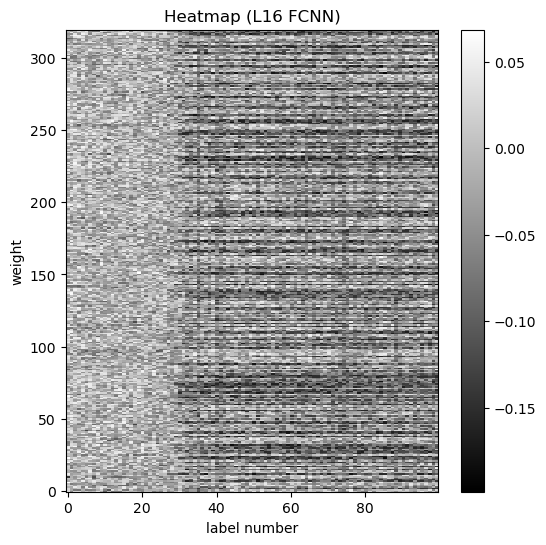

In [15]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image storage/L16_FCNN_wight.png')
plt.show()

In [9]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -1.3075936,  -2.120197 ,  -1.966537 ,  -3.4925027,  -3.273881 ,
        -5.064    ,  -2.9386885,  -6.0287275,  -4.416183 ,  -3.5727408,
        -4.9942193,  -4.7489624,  -4.5704117,  -6.176852 ,  -4.330729 ,
        -5.0268536,  -3.0780034,  -4.38776  ,  -5.1631203,  -3.6936817,
        -3.0498059,  -5.609805 ,  -6.4072638,  -4.3621917,  -6.1859884,
        -6.296885 ,  -4.6647663,  -8.243683 ,  -8.840327 ,  -8.410597 ,
       -11.877775 , -12.652579 , -16.609537 , -16.772331 , -12.779244 ,
       -23.098782 , -15.063828 , -14.58222  , -17.884338 , -12.680104 ,
       -21.198017 , -20.08897  , -18.960411 , -15.493744 , -14.396982 ,
       -14.198033 , -16.147587 , -15.518473 , -18.792128 , -15.17116  ,
       -15.738726 , -19.253765 , -15.907428 , -17.49414  , -17.365257 ,
       -14.761277 , -20.091747 , -18.266125 , -19.321592 , -16.501003 ,
       -17.214424 , -19.18401  , -17.767555 , -18.261097 , -20.822224 ,
       -16.661682 , -20.73265  , -17.409752 , -18.161154 , -17.4

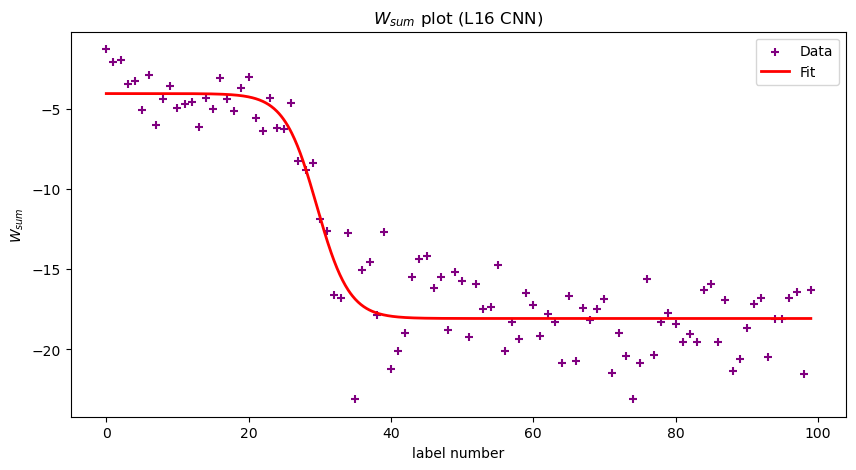

Fitted Parameters:
a: -7.0017209193764085
b: 0.21912474448408484
c: -6.482334325944499
d: -11.070151361431424


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L16 CNN)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
plt.savefig('../image storage/L16_FCNN_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [11]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 29.58284944590233
beta: 0.43905332885577697
